In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import datetime as dt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [4]:
gpath='/content/gdrive/My Drive/DataScience/proyectoFinal/'
csv_files=list(filter(lambda x: '.csv' in x, os.listdir(gpath)))
csv_files

['fxEURUSD.csv',
 'fxXAUUSD.csv',
 'fxGBPUSD.csv',
 'fxUSDJPY.csv',
 'fxUSDCHF.csv',
 'fxUSDCAD.csv',
 'fxAUDUSD.csv',
 'fxGER30.csv',
 'fxUK100.csv',
 'fxUSOil.csv',
 'fxETHUSD.csv',
 'fxEUSTX50.csv',
 'fxNAS100.csv',
 'fxSPX500.csv',
 'fxUS30.csv',
 'fxUSDOLLAR.csv',
 'fxXAGUSD.csv',
 'fxCopper.csv',
 'fxNGAS.csv',
 'fxSOYF.csv',
 'fxWHEATF.csv',
 'fxCORNF.csv']

In [5]:
#celda de prueba
df2=pd.read_csv(gpath+'fxEURUSD.csv')
df2.columns=df2.columns+'fxEURUSD.csv'
df2['DateTimefxEURUSD.csv']=df2['DateTimefxEURUSD.csv'].apply(lambda x: dt.datetime.strptime(x,'%m.%d.%Y %H:%M:%S'))
df2.rename(columns={'DateTimefxEURUSD.csv':'DateTime'}, inplace=True)
df2.set_index('DateTime', inplace=True)
df2.dtypes
df2.index.values

print(df2.head())

                     BidOpenfxEURUSD.csv  BidHighfxEURUSD.csv  \
DateTime                                                        
2001-10-21 22:00:00               0.8984               0.8987   
2001-10-21 23:00:00               0.8982               0.8987   
2001-10-22 00:00:00               0.8981               0.8990   
2001-10-22 01:00:00               0.8983               0.8989   
2001-10-22 02:00:00               0.8986               0.8987   

                     BidLowfxEURUSD.csv  BidClosefxEURUSD.csv  \
DateTime                                                        
2001-10-21 22:00:00              0.8979                0.8982   
2001-10-21 23:00:00              0.8978                0.8981   
2001-10-22 00:00:00              0.8980                0.8983   
2001-10-22 01:00:00              0.8983                0.8986   
2001-10-22 02:00:00              0.8978                0.8981   

                     AskOpenfxEURUSD.csv  AskHighfxEURUSD.csv  \
DateTime               

In [6]:
#subimos todos los datos al dataframe df
df=pd.DataFrame()

for filename in os.listdir(gpath):
  if filename.endswith('.csv'):
    print(filename)
    if df.empty:
      df=pd.read_csv(gpath+filename)
      df.columns=df.columns+filename
      #print(df.head())
    else:
      with open(gpath+filename) as f:
        tmp_df=pd.read_csv(gpath+filename)
        tmp_df.columns=tmp_df.columns+filename
        #df=pd.DataFrame(pd.concat((df,tmp_df),axis=1))
        df=df.join(tmp_df.set_index('DateTime'+filename), on='DateTimefxEURUSD.csv')
df.rename(columns={'DateTimefxEURUSD.csv':'DateTime'})
df['DateTime']=df['DateTimefxEURUSD.csv'].apply(lambda x: dt.datetime.strptime(x,'%m.%d.%Y %H:%M:%S'))
df.set_index('DateTime', inplace=True)

fxEURUSD.csv
fxXAUUSD.csv
fxGBPUSD.csv
fxUSDJPY.csv
fxUSDCHF.csv
fxUSDCAD.csv
fxAUDUSD.csv
fxGER30.csv
fxUK100.csv
fxUSOil.csv
fxETHUSD.csv
fxEUSTX50.csv
fxNAS100.csv
fxSPX500.csv
fxUS30.csv
fxUSDOLLAR.csv
fxXAGUSD.csv
fxCopper.csv
fxNGAS.csv
fxSOYF.csv
fxWHEATF.csv
fxCORNF.csv


In [7]:
df.dtypes

DateTimefxEURUSD.csv     object
BidOpenfxEURUSD.csv     float64
BidHighfxEURUSD.csv     float64
BidLowfxEURUSD.csv      float64
BidClosefxEURUSD.csv    float64
AskOpenfxEURUSD.csv     float64
AskHighfxEURUSD.csv     float64
AskLowfxEURUSD.csv      float64
AskClosefxEURUSD.csv    float64
VolumefxEURUSD.csv        int64
BidOpenfxXAUUSD.csv     float64
BidHighfxXAUUSD.csv     float64
BidLowfxXAUUSD.csv      float64
BidClosefxXAUUSD.csv    float64
AskOpenfxXAUUSD.csv     float64
AskHighfxXAUUSD.csv     float64
AskLowfxXAUUSD.csv      float64
AskClosefxXAUUSD.csv    float64
VolumefxXAUUSD.csv      float64
BidOpenfxGBPUSD.csv     float64
BidHighfxGBPUSD.csv     float64
BidLowfxGBPUSD.csv      float64
BidClosefxGBPUSD.csv    float64
AskOpenfxGBPUSD.csv     float64
AskHighfxGBPUSD.csv     float64
AskLowfxGBPUSD.csv      float64
AskClosefxGBPUSD.csv    float64
VolumefxGBPUSD.csv      float64
BidOpenfxUSDJPY.csv     float64
BidHighfxUSDJPY.csv     float64
                         ...   
AskLowfx

In [8]:
#filtramos sólo volumen y precio de cierre
df_filtered=df.loc[:, df.columns.str.contains('Volume') + df.columns.str.contains('BidClose')]
df_filtered.head()

,BidClosefxEURUSD.csv,VolumefxEURUSD.csv,BidClosefxXAUUSD.csv,VolumefxXAUUSD.csv,BidClosefxGBPUSD.csv,VolumefxGBPUSD.csv,BidClosefxUSDJPY.csv,VolumefxUSDJPY.csv,BidClosefxUSDCHF.csv,VolumefxUSDCHF.csv,...,BidClosefxCopper.csv,VolumefxCopper.csv,BidClosefxNGAS.csv,VolumefxNGAS.csv,BidClosefxSOYF.csv,VolumefxSOYF.csv,BidClosefxWHEATF.csv,VolumefxWHEATF.csv,BidClosefxCORNF.csv,VolumefxCORNF.csv
DateTime,,,,,,,,,,,,,,,,,,,,,
2001-10-21 22:00:00,0.8982,0,NaN,NaN,1.4330,0.0,121.27,0.0,1.6432,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-21 23:00:00,0.8981,0,NaN,NaN,1.4331,0.0,121.42,0.0,1.6435,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-22 00:00:00,0.8983,0,NaN,NaN,1.4343,0.0,121.32,0.0,1.6435,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-22 01:00:00,0.8986,0,NaN,NaN,1.4346,0.0,121.35,0.0,1.6428,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-22 02:00:00,0.8981,0,NaN,NaN,1.4343,0.0,121.40,0.0,1.6434,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Estadísticas básicas para volumen y precio de cierre
pd.concat((df_filtered.describe().transpose(),
           df_filtered.isnull().sum()),#cuenta de nulls
          axis=1)

,count,mean,std,min,25%,50%,75%,max,0
BidClosefxEURUSD.csv,105510.0,1.247523,0.145043,0.85670,1.143863,1.264200,1.34720,1.60126,0
VolumefxEURUSD.csv,105510.0,4149.126187,6350.351777,0.00000,274.000000,1805.000000,5344.00000,108478.00000,0
BidClosefxXAUUSD.csv,57481.0,1316.549455,208.184431,865.95000,1197.180000,1277.900000,1390.65000,1917.70000,48029
VolumefxXAUUSD.csv,57481.0,5595.004593,6852.720493,0.00000,1198.000000,3363.000000,7361.00000,114814.00000,48029
BidClosefxGBPUSD.csv,105324.0,1.621634,0.201139,1.19992,1.503953,1.596175,1.76710,2.11236,186
VolumefxGBPUSD.csv,105324.0,4178.987287,6519.951565,0.00000,321.000000,1591.000000,5127.00000,132669.00000,186
BidClosefxUSDJPY.csv,105388.0,105.556984,13.905641,75.66700,96.989750,108.570000,116.95275,134.95000,122
VolumefxUSDJPY.csv,105388.0,3900.727436,6127.973088,0.00000,295.000000,1524.000000,4759.00000,123420.00000,122
BidClosefxUSDCHF.csv,105320.0,1.102982,0.192792,0.71614,0.956930,1.026390,1.23600,1.72130,190
VolumefxUSDCHF.csv,105320.0,3059.917176,4448.223846,0.00000,286.000000,1437.000000,4032.25000,79089.00000,190


In [10]:
print(df.shape,df_filtered.shape)

(105510, 199) (105510, 44)


In [11]:
%%time
for i in csv_files:
  ax = df.plot( y='BidClose'+i, use_index=True, legend=False,figsize=(25,10))
  ax2 = ax.twinx()
  df.plot(y='Volume'+i, use_index=True,ax=ax2,legend=False,color="r")
  ax.figure.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

CPU times: user 1.37 s, sys: 140 ms, total: 1.51 s
Wall time: 1.41 s


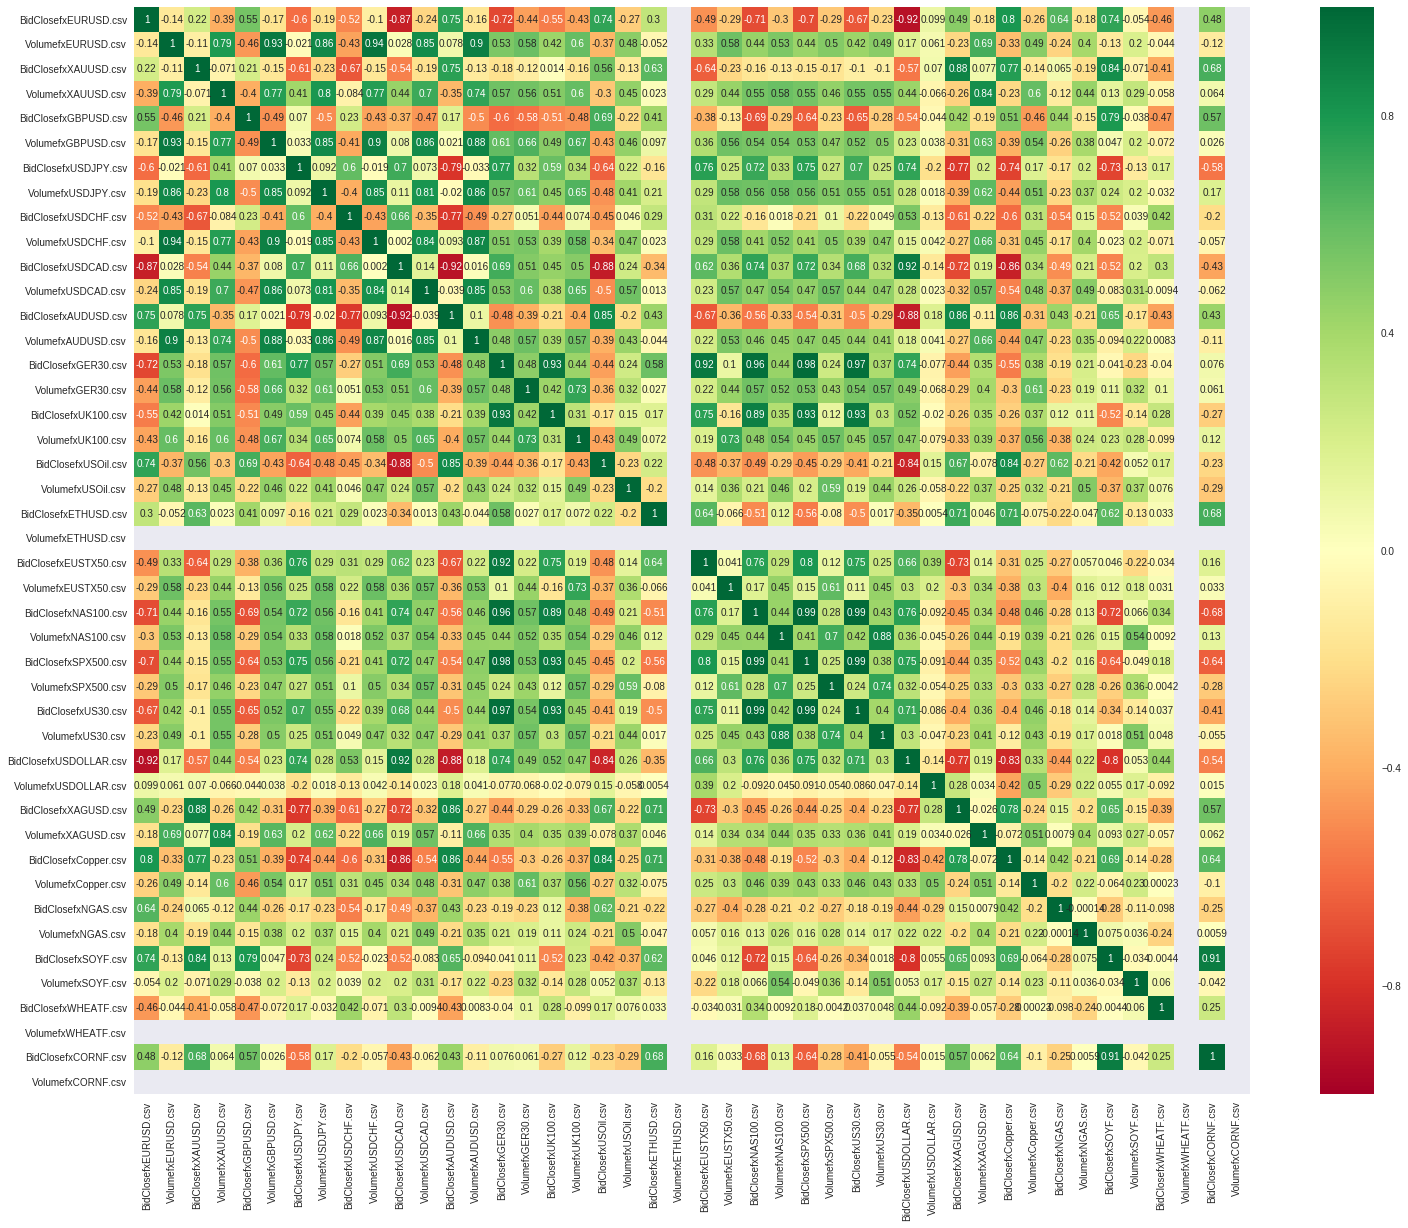

In [12]:
#Correlación
# plot the heatmap
%%time
top_corr_features = df_filtered.columns#.drop(['income'])
plt.figure(figsize=(25,20))
g=sns.heatmap(df_filtered[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
#Reemplazamos NAN con el último valor conocido
df_filtered.fillna(method='ffill', inplace=True)
df_filtered.fillna(method='bfill', inplace=True)
pd.concat((df_filtered.describe().transpose(),
           df_filtered.isnull().sum()),#cuenta de nulls
          axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,count,mean,std,min,25%,50%,75%,max,0
BidClosefxEURUSD.csv,105510.0,1.247523,0.145043,0.85670,1.143863,1.264200,1.34720,1.60126,0
VolumefxEURUSD.csv,105510.0,4149.126187,6350.351777,0.00000,274.000000,1805.000000,5344.00000,108478.00000,0
BidClosefxXAUUSD.csv,105510.0,1162.564545,233.697947,865.95000,963.300000,1108.095000,1294.12000,1917.70000,0
VolumefxXAUUSD.csv,105510.0,3084.028575,5767.132574,0.00000,0.000000,409.000000,3882.00000,114814.00000,0
BidClosefxGBPUSD.csv,105510.0,1.621722,0.201189,1.19992,1.503987,1.596200,1.76740,2.11236,0
VolumefxGBPUSD.csv,105510.0,4174.639778,6515.894666,0.00000,320.000000,1588.000000,5120.00000,132669.00000,0
BidClosefxUSDJPY.csv,105510.0,105.562644,13.903362,75.66700,97.019250,108.575000,116.96000,134.95000,0
VolumefxUSDJPY.csv,105510.0,3897.734158,6125.640101,0.00000,294.000000,1521.000000,4755.00000,123420.00000,0
BidClosefxUSDCHF.csv,105510.0,1.103090,0.192796,0.71614,0.956950,1.026510,1.23610,1.72130,0
VolumefxUSDCHF.csv,105510.0,3055.851275,4445.439393,0.00000,285.000000,1433.000000,4027.00000,79089.00000,0


In [14]:
print(df.shape,df_filtered.shape)

(105510, 199) (105510, 44)


Datos train:  (79133, 43)
Datos test:   (26377, 43)
Propocion train:1.280
Propocion test: 1.149


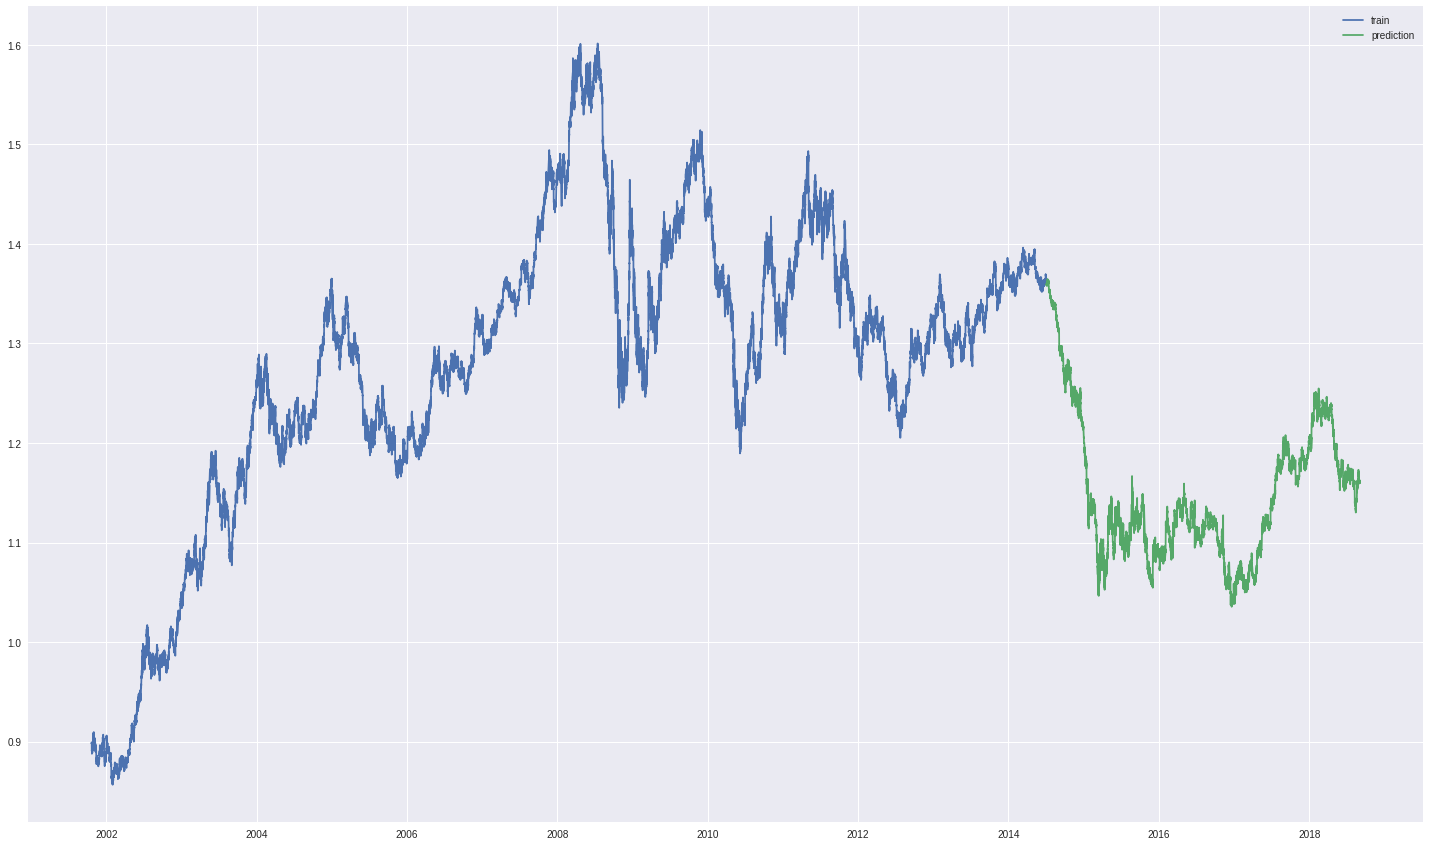

In [21]:
# preparamos los datos

columns_to_drop=['BidClosefxEURUSD.csv']
features = df_filtered.columns.drop(columns_to_drop)

X = df_filtered[features].as_matrix()
y = df_filtered['BidClosefxEURUSD.csv'].as_matrix()

offset = int(df_filtered.shape[0]*0.25) # 0.25 of 731

# PASO 1:
X_train = X[:-offset, :]
y_train = y[:-offset]
x_axis_train=df_filtered.index[:-offset]

X_test  = X[-offset:, :]
y_test  = y[-offset:]
x_axis_test=df_filtered.index[-offset:]

#Paso 2: Escalar
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

plt.figure(figsize=(25,15))
plt.plot(x_axis_train,y_train, label='train')
plt.plot(x_axis_test,y_test,label='prediction')
plt.legend()
plt.show()

In [17]:
#búsqueda de parámetros libres
tscv = TimeSeriesSplit(n_splits=3)

alpha_vector = np.logspace(-50,50,50)#start,stop,#samples
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = tscv.split(X_train)).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

best mean cross-validation score: 0.678
best parameters: {'alpha': 4.094915062380419e-20}


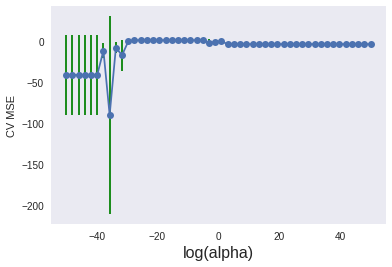

In [18]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [19]:
#Métricas en test
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 6.9e-05
MSE Modelo Lasso (test) : 0.00336
VolumefxEURUSD.csv -1.0623672567936822e-06
BidClosefxXAUUSD.csv -0.00010121632748036454
VolumefxXAUUSD.csv -6.0820220220846e-07
BidClosefxGBPUSD.csv -0.6912361837638965
VolumefxGBPUSD.csv 1.0800087789261516e-07
BidClosefxUSDJPY.csv 0.008041485859422317
VolumefxUSDJPY.csv 2.1676569339076436e-06
BidClosefxUSDCHF.csv -0.21500520333588957
VolumefxUSDCHF.csv 1.133776024856239e-07
BidClosefxUSDCAD.csv 0.010384973506781157
VolumefxUSDCAD.csv -3.953271385111278e-07
BidClosefxAUDUSD.csv -0.9351845083215296
VolumefxAUDUSD.csv -1.0953940709985144e-06
BidClosefxGER30.csv -1.1989592249105918e-05
VolumefxGER30.csv -7.687827226041475e-07
BidClosefxUK100.csv -3.841922414453667e-06
VolumefxUK100.csv 2.0815377387160404e-06
BidClosefxUSOil.csv 4.558230445061336e-06
VolumefxUSOil.csv 1.1744888902834207e-06
BidClosefxETHUSD.csv 0.0
VolumefxETHUSD.csv 0.0
BidClosefxEUSTX50.csv 6.375929136867444e-05
VolumefxEUSTX50.csv 2.4427005669407284e-05

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


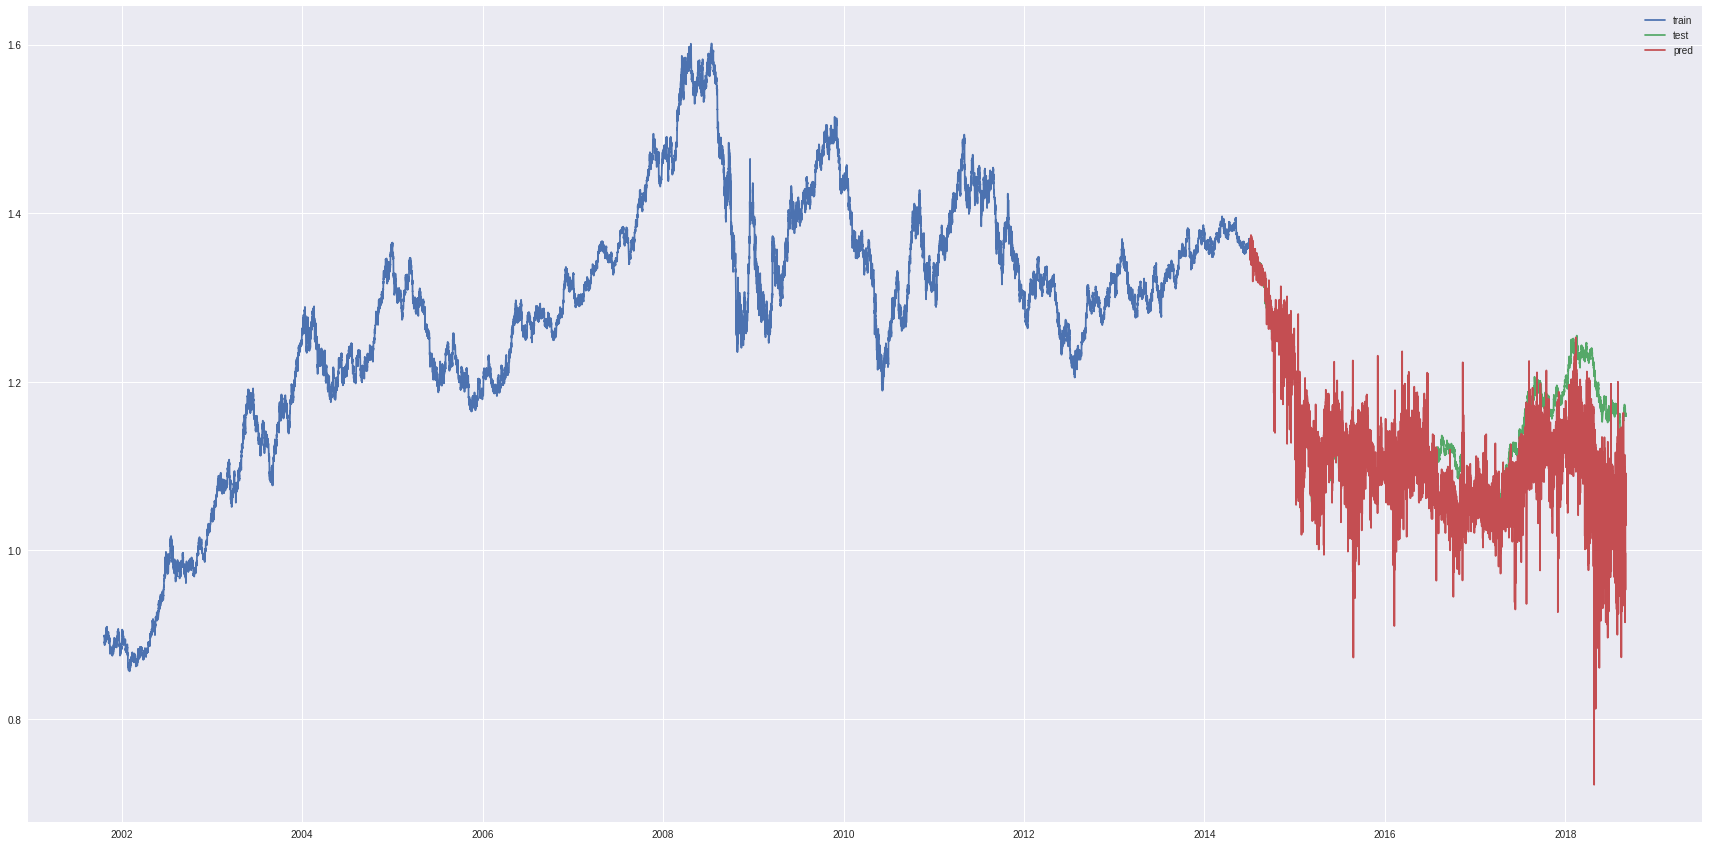

In [20]:
#Representación de la predicción
plt.figure(figsize=(30,15))
plt.plot(x_axis_train,y_train, label='train')
plt.plot(x_axis_test,y_test,label='test')
plt.plot(x_axis_test,ytestLasso,label='pred')
plt.legend()
plt.show()